## Predição de Turnover (Rotatividade) de Funcionários com Machine Learning

📁 **Etapas do Projeto:** 

**1.** Leitura e Exploração Inicial dos Dados

**2.** Limpeza e Preparação dos Dados

**3.** Análise Exploratória (EDA)

**4.** Modelagem Preditiva

**5.** Avaliação dos Modelos

**6.** Explicação dos Modelos com SHAP

**7.** Relatório/Apresentação de Resultados

---

### Objetivo da Análise:
Construir um modelo preditivo que identifique padrões de rotatividade (attrition) e oferecer recomendações ao RH para ações preventivas.

### Perguntas Norteadoras:

- Quais características mais influenciam na rotatividade de funcionários?

- Qual perfil de colaborador tem maior propensão a sair da empresa?

- Um modelo de ML pode prever com boa precisão a saída de um funcionário?

- Que ações a empresa pode tomar com base nessas previsões?

---

⚙️ **Dataset utilizado:** [Kaggle - IBM HR Analytics Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)

🛠️ **Ferramentas Utilizadas:** Pandas, Numpy, Seaborn, Matplotlib, Scikit-learn, XGBoost, Jupyter Notebook

---




### 🔹Etapa 1 – Leitura e Exploração Inicial dos Dados
**Objetivo:**

Nesta etapa, será carregado o conjunto de dados para obter uma visão geral sobre suas características:

- Conhecer as variáveis disponíveis

- Identificar a variável alvo

- Investigar a estrutura e integridade dos dados

- Fazer as primeiras observações sobre possíveis padrões ou problemas

### 1.1 Importando bibliotecas

In [149]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import plot_importance, XGBClassifier

### 1.2 Importando dataset e explorando os dados iniciais

In [150]:
# importando dataset e lendo as primeiras linhas
df = pd.read_csv('data/rh_dataset.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [151]:
# verificando quantidade de linhas e colunas
df.shape

(1470, 35)

In [152]:
# verificando os nomes de todas as colunas disponíveis
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

O dataset possui 35 colunas, onde temos variáveis categóricas e numéricas. Destas, só irei selecionar as que forem pertinentes à análise.

In [153]:
# verificando se existem valores ausentes
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Verifica-se que não existem valores nulos no dataset.

### 1.3 Entendendo a variável alvo (target) da análise:

Para o objetivo de análise desse projeto, a variável alvo é *Attrition*, que identifica a rotatividade na empresa.

In [154]:
# verificando a proporção de attrition (target)
df['Attrition'].value_counts(normalize=True) * 100

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

Nota-se que existem um **desbalanceamento** entre as duas classes. Sendo a proporção de 'não' maior do que a de 'sim', que seria a classe que queremos avaliar. Será então necessário utilizar técnicas de balanceamento posteriormente.

### 🔹 Etapa 2 – Limpeza e Preparação dos Dados
**Objetivo:** Preparar os dados para a modelagem:

- Transformações nas variáveis

- Codificação de variáveis categóricas

- Conversão da variável-alvo em binária

- Análise de colunas redundantes ou inúteis

- Eventualmente, normalização/escalonamento

### 2.1 Removendo colunas irrelevantes

In [155]:
# removendo colunas irrelevantes para a análise
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

Por que remover essas colunas?

```EmployeeCount```: é constante (valor 1 para todos);

```Over18```: todos os funcionários têm mais de 18 anos;

```StandardHours```: também é constante;

```EmployeeNumber```: apenas um identificador único (não tem valor preditivo).

### 2.2 Categorização Binária da variável alvo e Encoding de variáveis categóricas

In [7]:
# transformando a target (attrition) em binária para poder treinar os modelos
df['Attrition'] = df['Attrition'].map({'Yes' : 1, 'No' : 0})

In [8]:
# subdividr as variáveis categóricas e variáveis numéricas para facilitar o tratamento delas
cat_col = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['int64', 'float64']).drop('Attrition', axis=1).columns

print(f'categóricas: {cat_col}')
print(f'numéricas: {num_cols}')

categóricas: Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')
numéricas: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [9]:
# transformando as variáveis categóricas em colunas binárias para os modelos
df_encoding = pd.get_dummies(df, columns=cat_col, drop_first=True)

### 2.3 Definindo features e target

In [10]:
# definindo a variável alvo (y) e variável preditora (X)
X = df_encoding.drop('Attrition', axis=1)
y = df_encoding['Attrition']

### 2.4 Dimensionando features numéricas

In [11]:
# normalizando as variáveis numéricas
scaler = StandardScaler()
X_scales = scaler.fit_transform(X)

In [12]:
# veriricando se tudo está numérico e dimensões de X e y
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')
print(X.dtypes.unique())

X shape: (1470, 44)
y shape: (1470,)
[dtype('int64') dtype('bool')]


### 🔹 Etapa 3 – Análise Exploratória dos Dados (EDA)
**Objetivo:** 

Investigar o comportamento das variáveis, entender padrões, relações com a variável alvo (Attrition) e descobrir insights que possam ajudar na modelagem e nas recomendações.

### 3.1 Distribuição de *Attrition*

([<matplotlib.axis.XTick at 0x21a1b9292b0>,
 [Text(0, 0, 'Ficaram'), Text(1, 0, 'Saíram')])

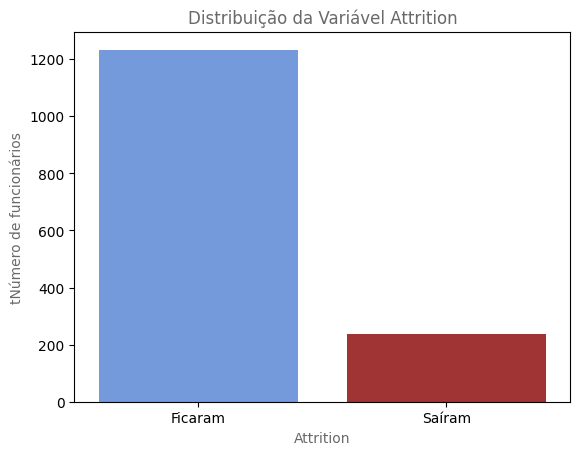

In [13]:
# analisando a variável alvo
colors = ['cornflowerblue', 'firebrick']
sns.countplot(x='Attrition', data=df, hue='Attrition', legend=False, palette=colors)
plt.title('Distribuição da Variável Attrition', color='dimgrey')
plt.xlabel('Attrition', color='dimgrey')
plt.ylabel('tNúmero de funcionários', color='dimgrey')
plt.xticks([0,1], ['Ficaram', 'Saíram'])

### 3.2 Ditribuição das variáveis numéricas

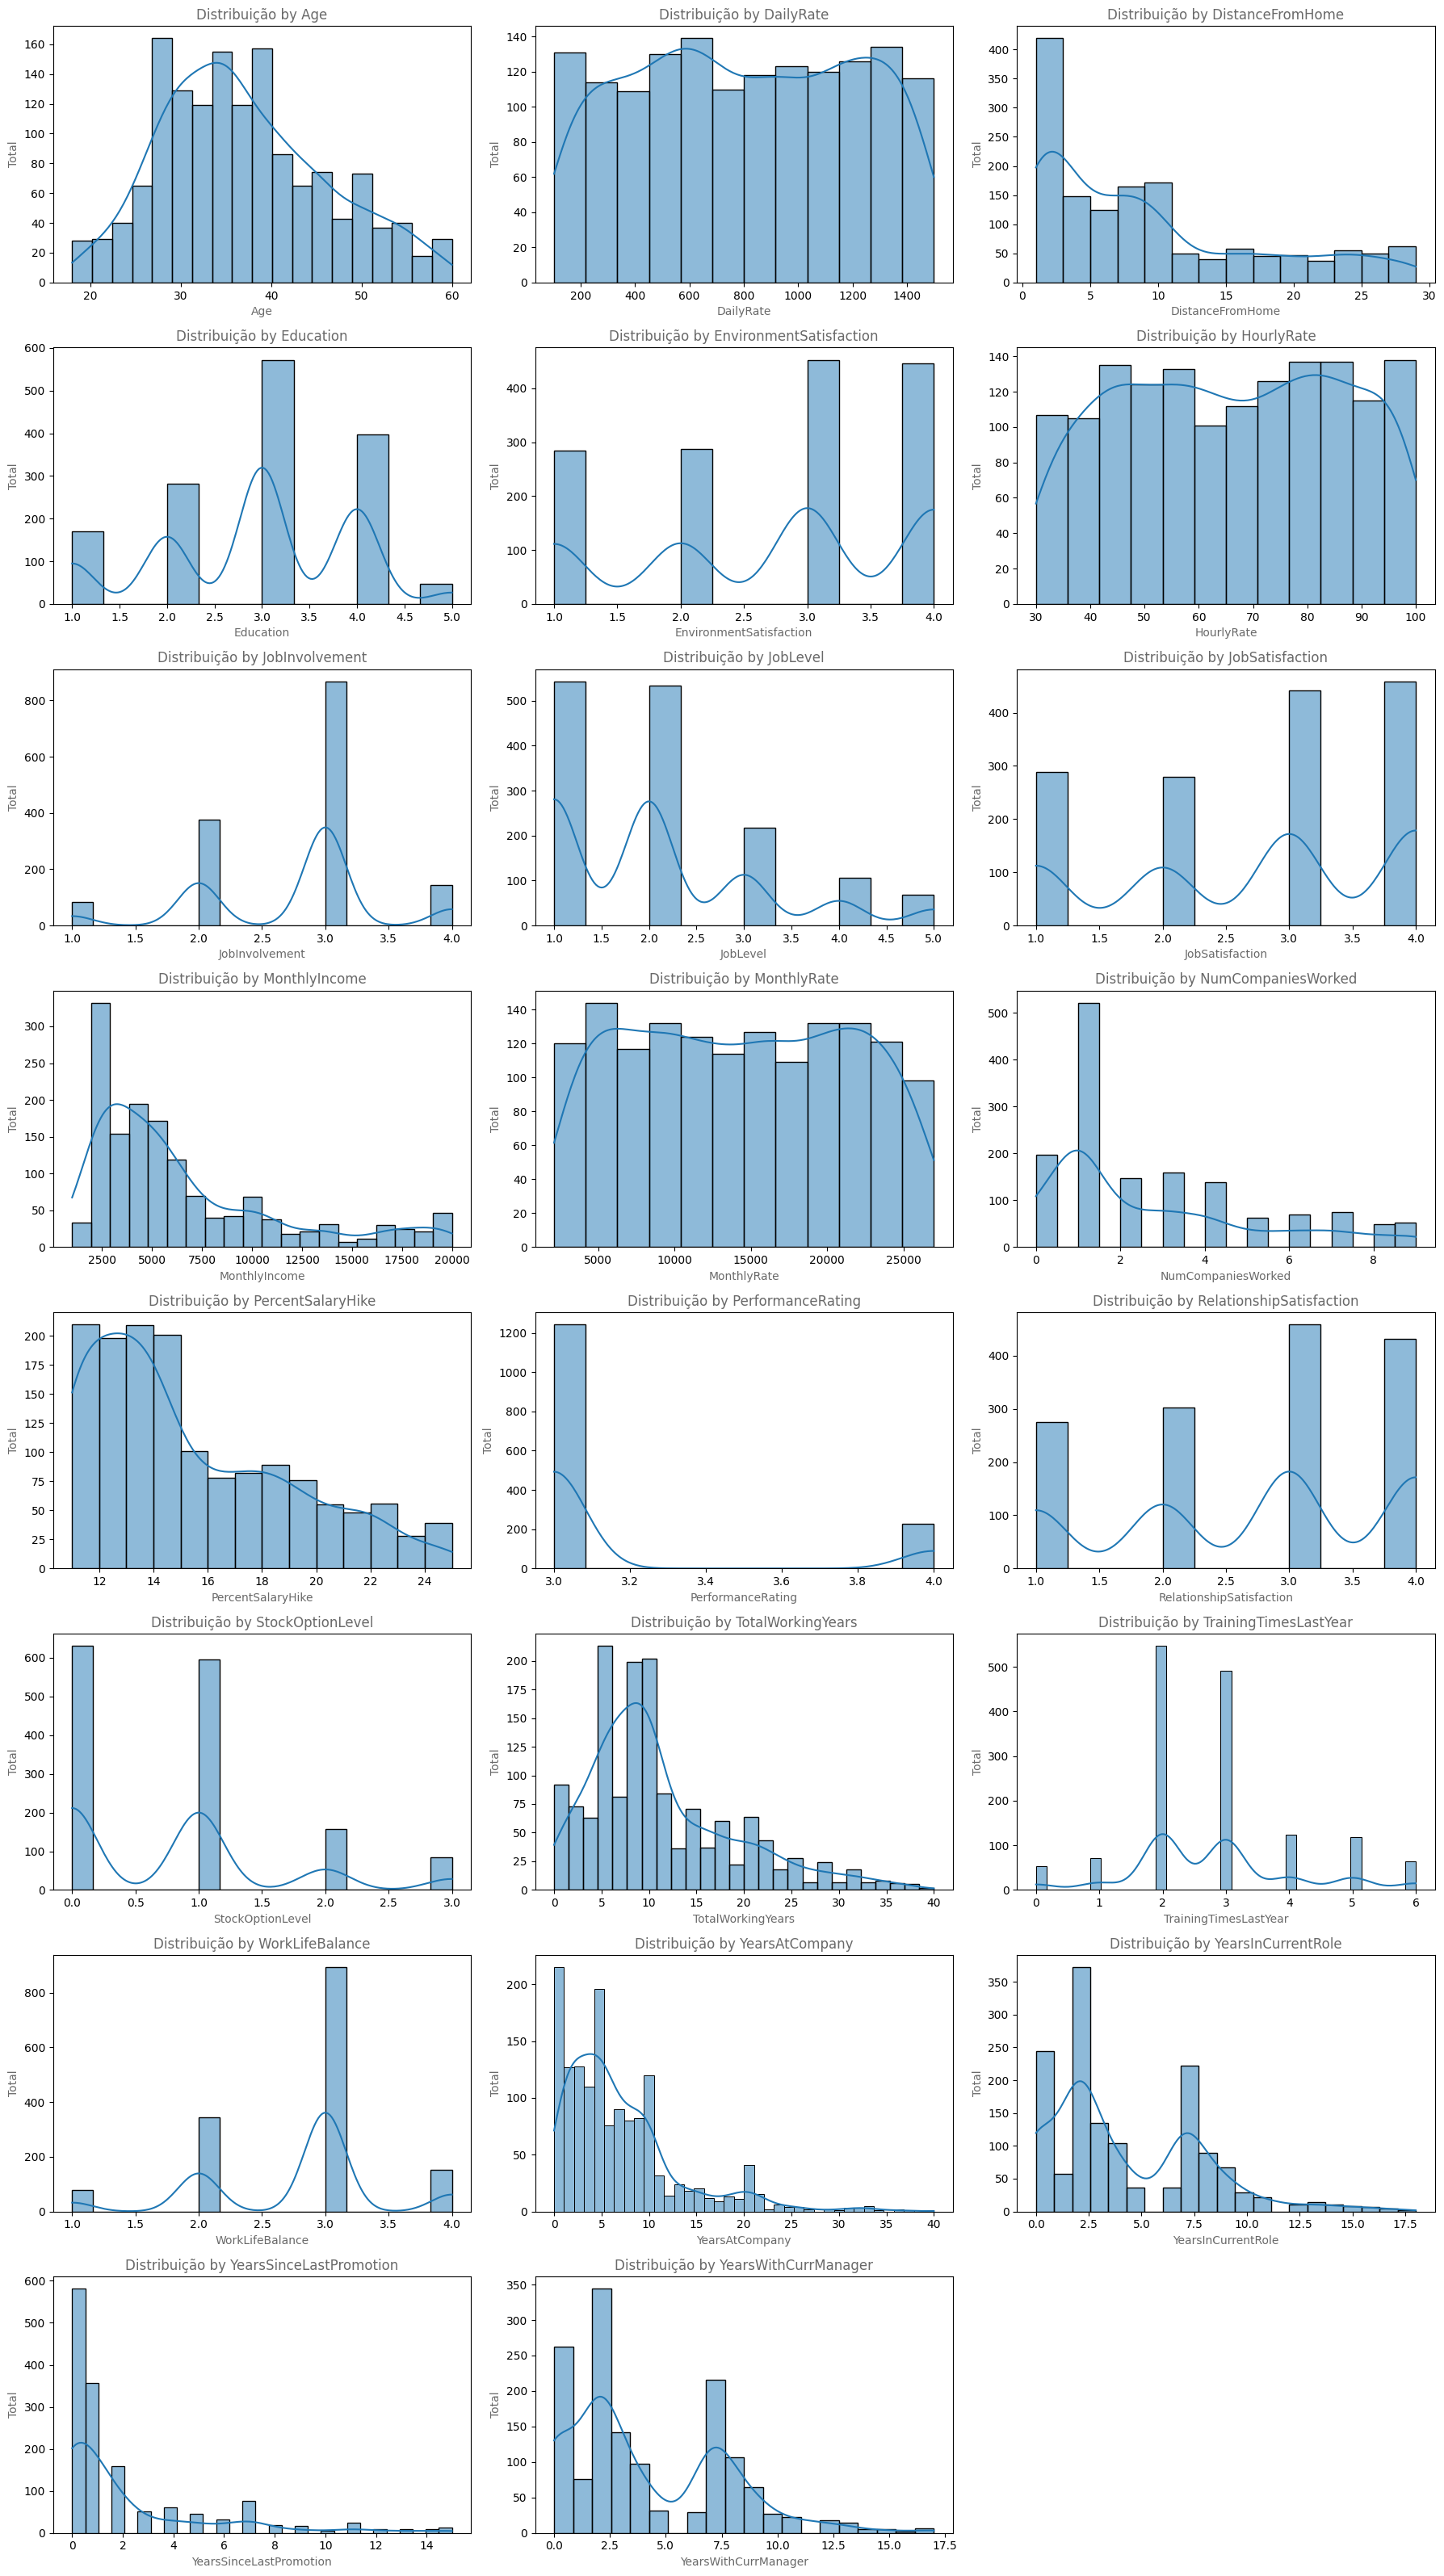

In [14]:
# histograma
n_cols = 3
n_vars = len(num_cols)
n_rows = math.ceil(n_vars / n_cols)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, var in enumerate(num_cols):
    sns.histplot(df[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribuição by {var}', color='dimgrey')
    axes[i].set_xlabel(var, color='dimgrey')
    axes[i].set_ylabel('Total', color='dimgrey')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
plt.close()

A partir da análise dos gráficos de distribuição, foi possível verificar as variáveis numéricas com maior relevância:

1. ```Age```

- Distribuição próxima do normal, com leve assimetria à direita.

- Apresenta uma boa dispersão de valores.

- Pode ser relevante para entender se há faixas etárias com mais propensão a sair da empresa.

2. ```MonthlyIncome```

- Fortemente assimétrica à direita.

- A maioria dos funcionários tem renda baixa, mas há alguns com valores muito altos (outliers).

- Essa assimetria pode indicar que o nível salarial influencia decisões de saída, principalmente entre os que ganham menos.

3. ```NumCompaniesWorked```

- Distribuição com muitos zeros (quem trabalhou só em uma empresa) e uma longa cauda à direita.

- Pode indicar perfis de profissionais com histórico instável, relevante para rotatividade.

4. ```DistanceFromHome```

- Levemente assimétrica, com picos em valores baixos e cauda longa.

- Pode sugerir que pessoas que moram mais longe tenham maior probabilidade de sair.

5. ```YearsAtCompany``` / ```YearsWithCurrManager``` / ```YearsInCurrentRole```

- Distribuições concentradas em valores baixos (muitos funcionários estão há pouco tempo na empresa).

- Isso indica um perfil de funcionários recentes que pode estar associado à maior rotatividade.

7. ```JobLevel``` / ```StockOptionLevel```

- Distribuições muito concentradas nos níveis mais baixos.

- A baixa variabilidade sugere desigualdade de acesso a benefícios, o que pode contribuir para insatisfação.

8. ```Education``` / ```EnvironmentSatisfaction``` / ```WorkLifeBalance```

- São variáveis categóricas com variação visível entre os níveis.

- Especialmente "EnvironmentSatisfaction" parece bem distribuída entre os níveis, podendo indicar impacto no bem-estar.


### 3.3 Distribuição das variáveis numéricas por *Attrition*

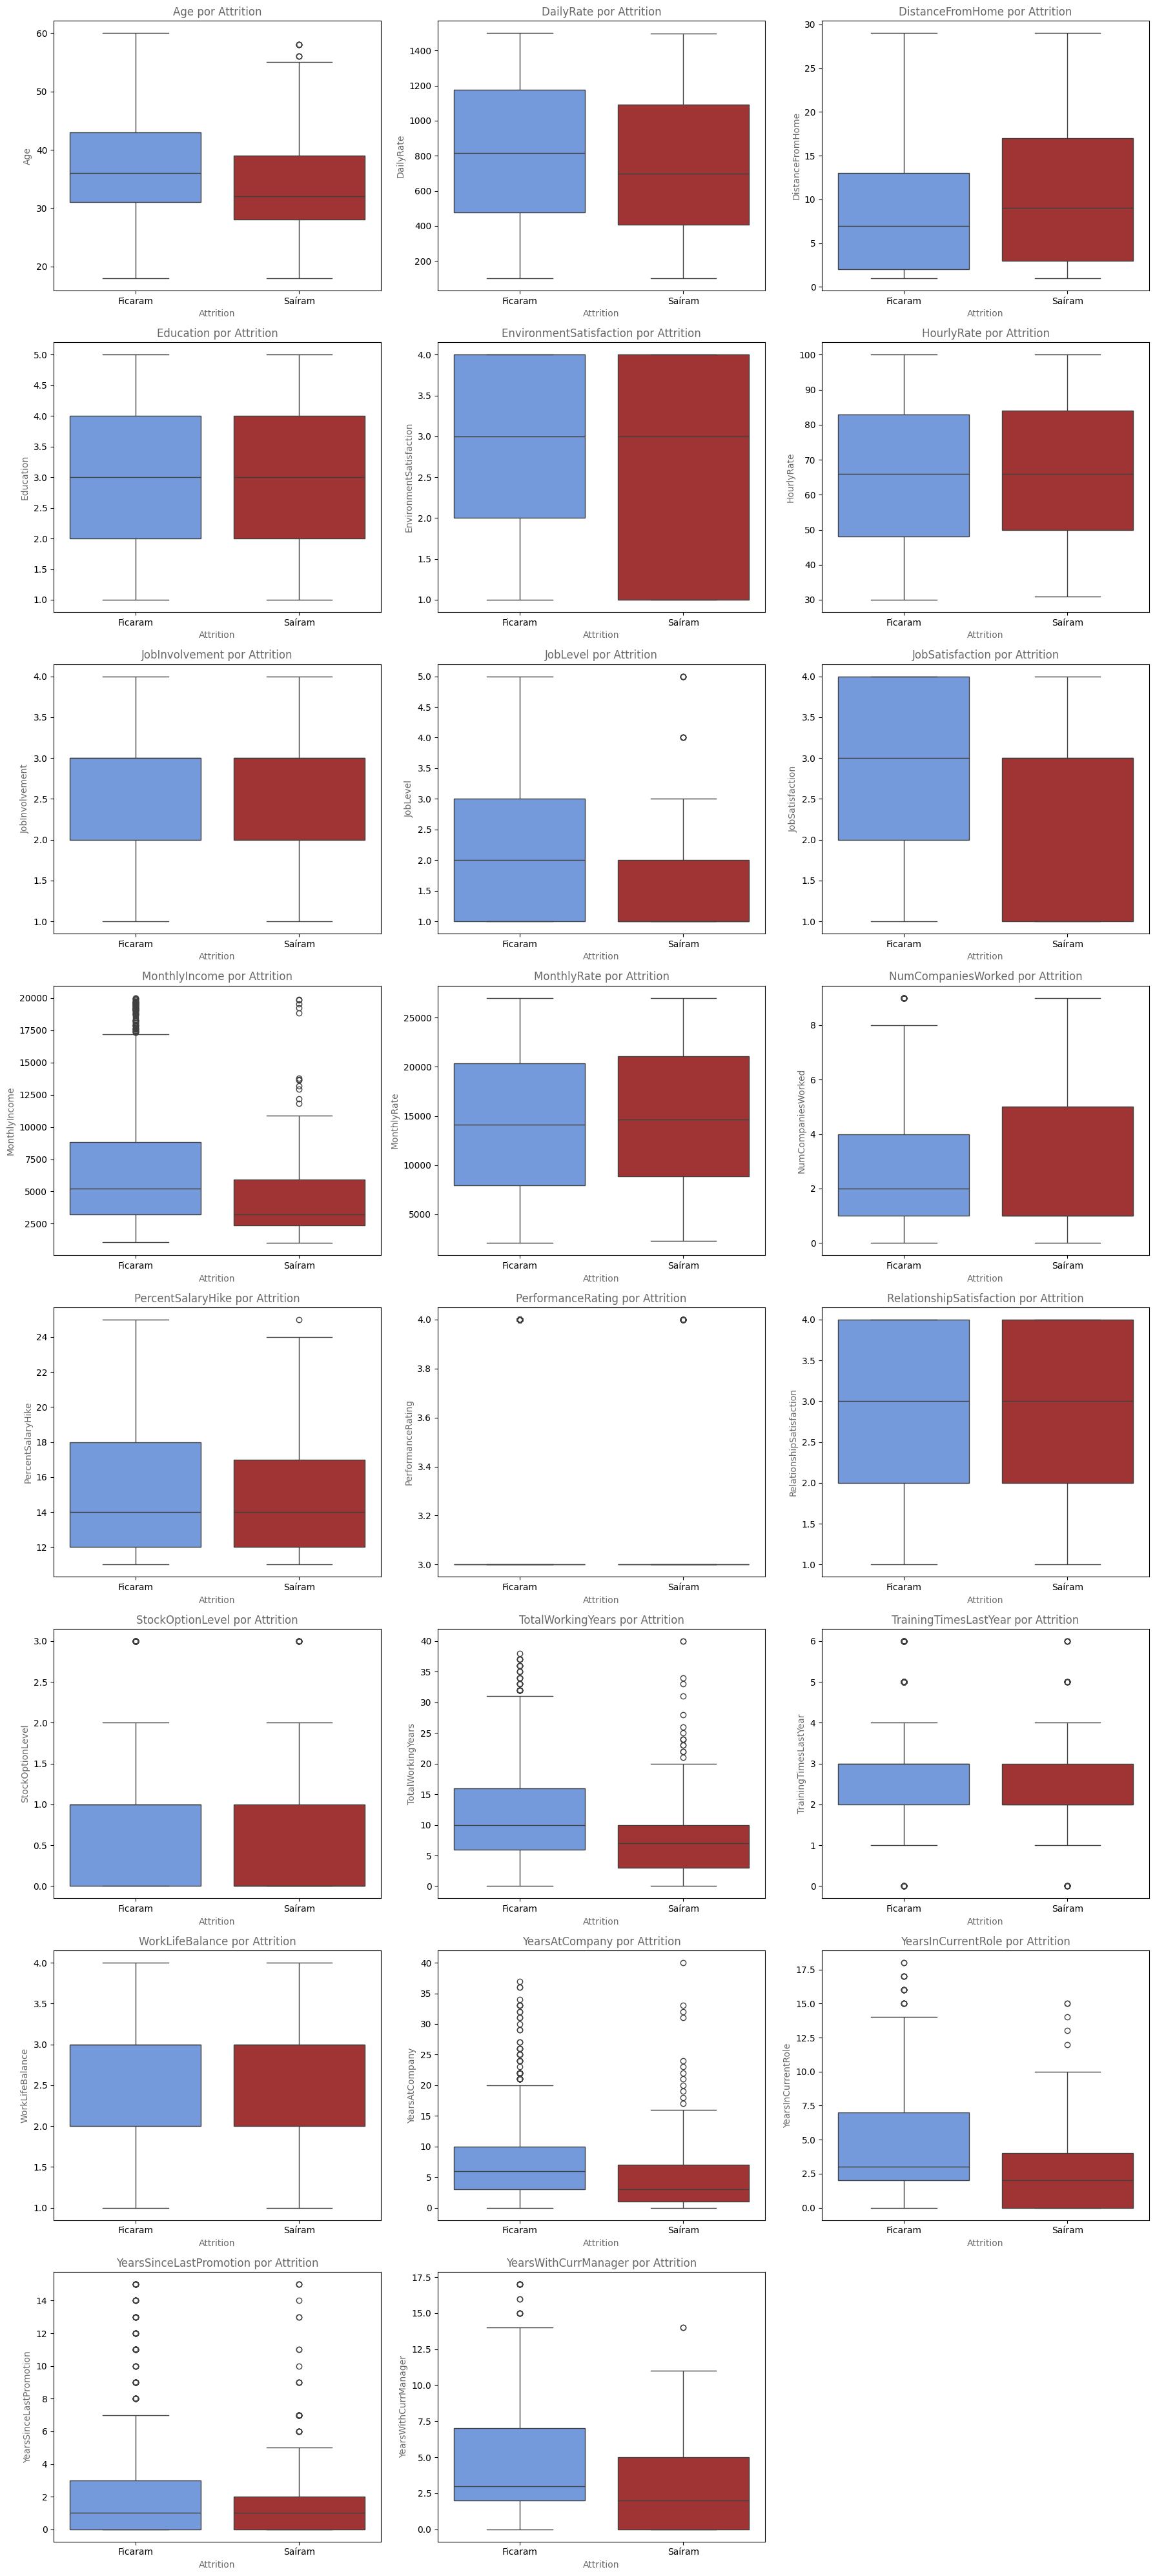

In [15]:
# boxplots
colors = ['cornflowerblue', 'firebrick']
n_cols = 3
n_vars = len(num_cols)
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, num in enumerate(num_cols):
    sns.boxplot(x='Attrition', y=num, hue='Attrition', palette=colors, data=df, legend=False, ax=axes[i])
    axes[i].set_title(f'{num} por Attrition', color='dimgrey')
    axes[i].set_xlabel('Attrition', color='dimgrey')
    axes[i].set_ylabel(num, color='dimgrey')
    axes[i].set_xticks([0,1])
    axes[i].set_xticklabels(['Ficaram', 'Saíram'])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
plt.close()

Analisando agora os boxplots da distribuição das variáveis pela 'Attrition', identifica-se algumas com distribuição mais marcante:

1. ```MonthlyIncome```

- Alta dispersão entre os valores.

- Muitos outliers, principalmente entre os que "ficaram".

- Distribuição assimétrica.

2. ```TotalWorkingYears```

- Diferencia bem os grupos.

- Faixa ampla com outliers no topo, indicando diversidade de experiência.

3. ```YearsAtCompany```

- Distribuição bastante assimétrica, com grande concentração em valores baixos.

- Muitos outliers acima de 10 anos.

4. ```YearsInCurrentRole``` e ```YearsWithCurrManager```

- Padrões semelhantes: valores mais concentrados abaixo de 5 anos.

- Apresentam distorções com outliers acima de 10.

5. ```NumCompaniesWorked```

- Concentração nos valores baixos, mas com dispersão notável.

- Indica histórico profissional diverso.

6. ```Age```

- Variação significativa, com uma faixa ampla entre 20 e 60 anos.

- Leve assimetria e poucos outliers.

### 3.4 Distribuição das variáveis categórias por *Attrition*

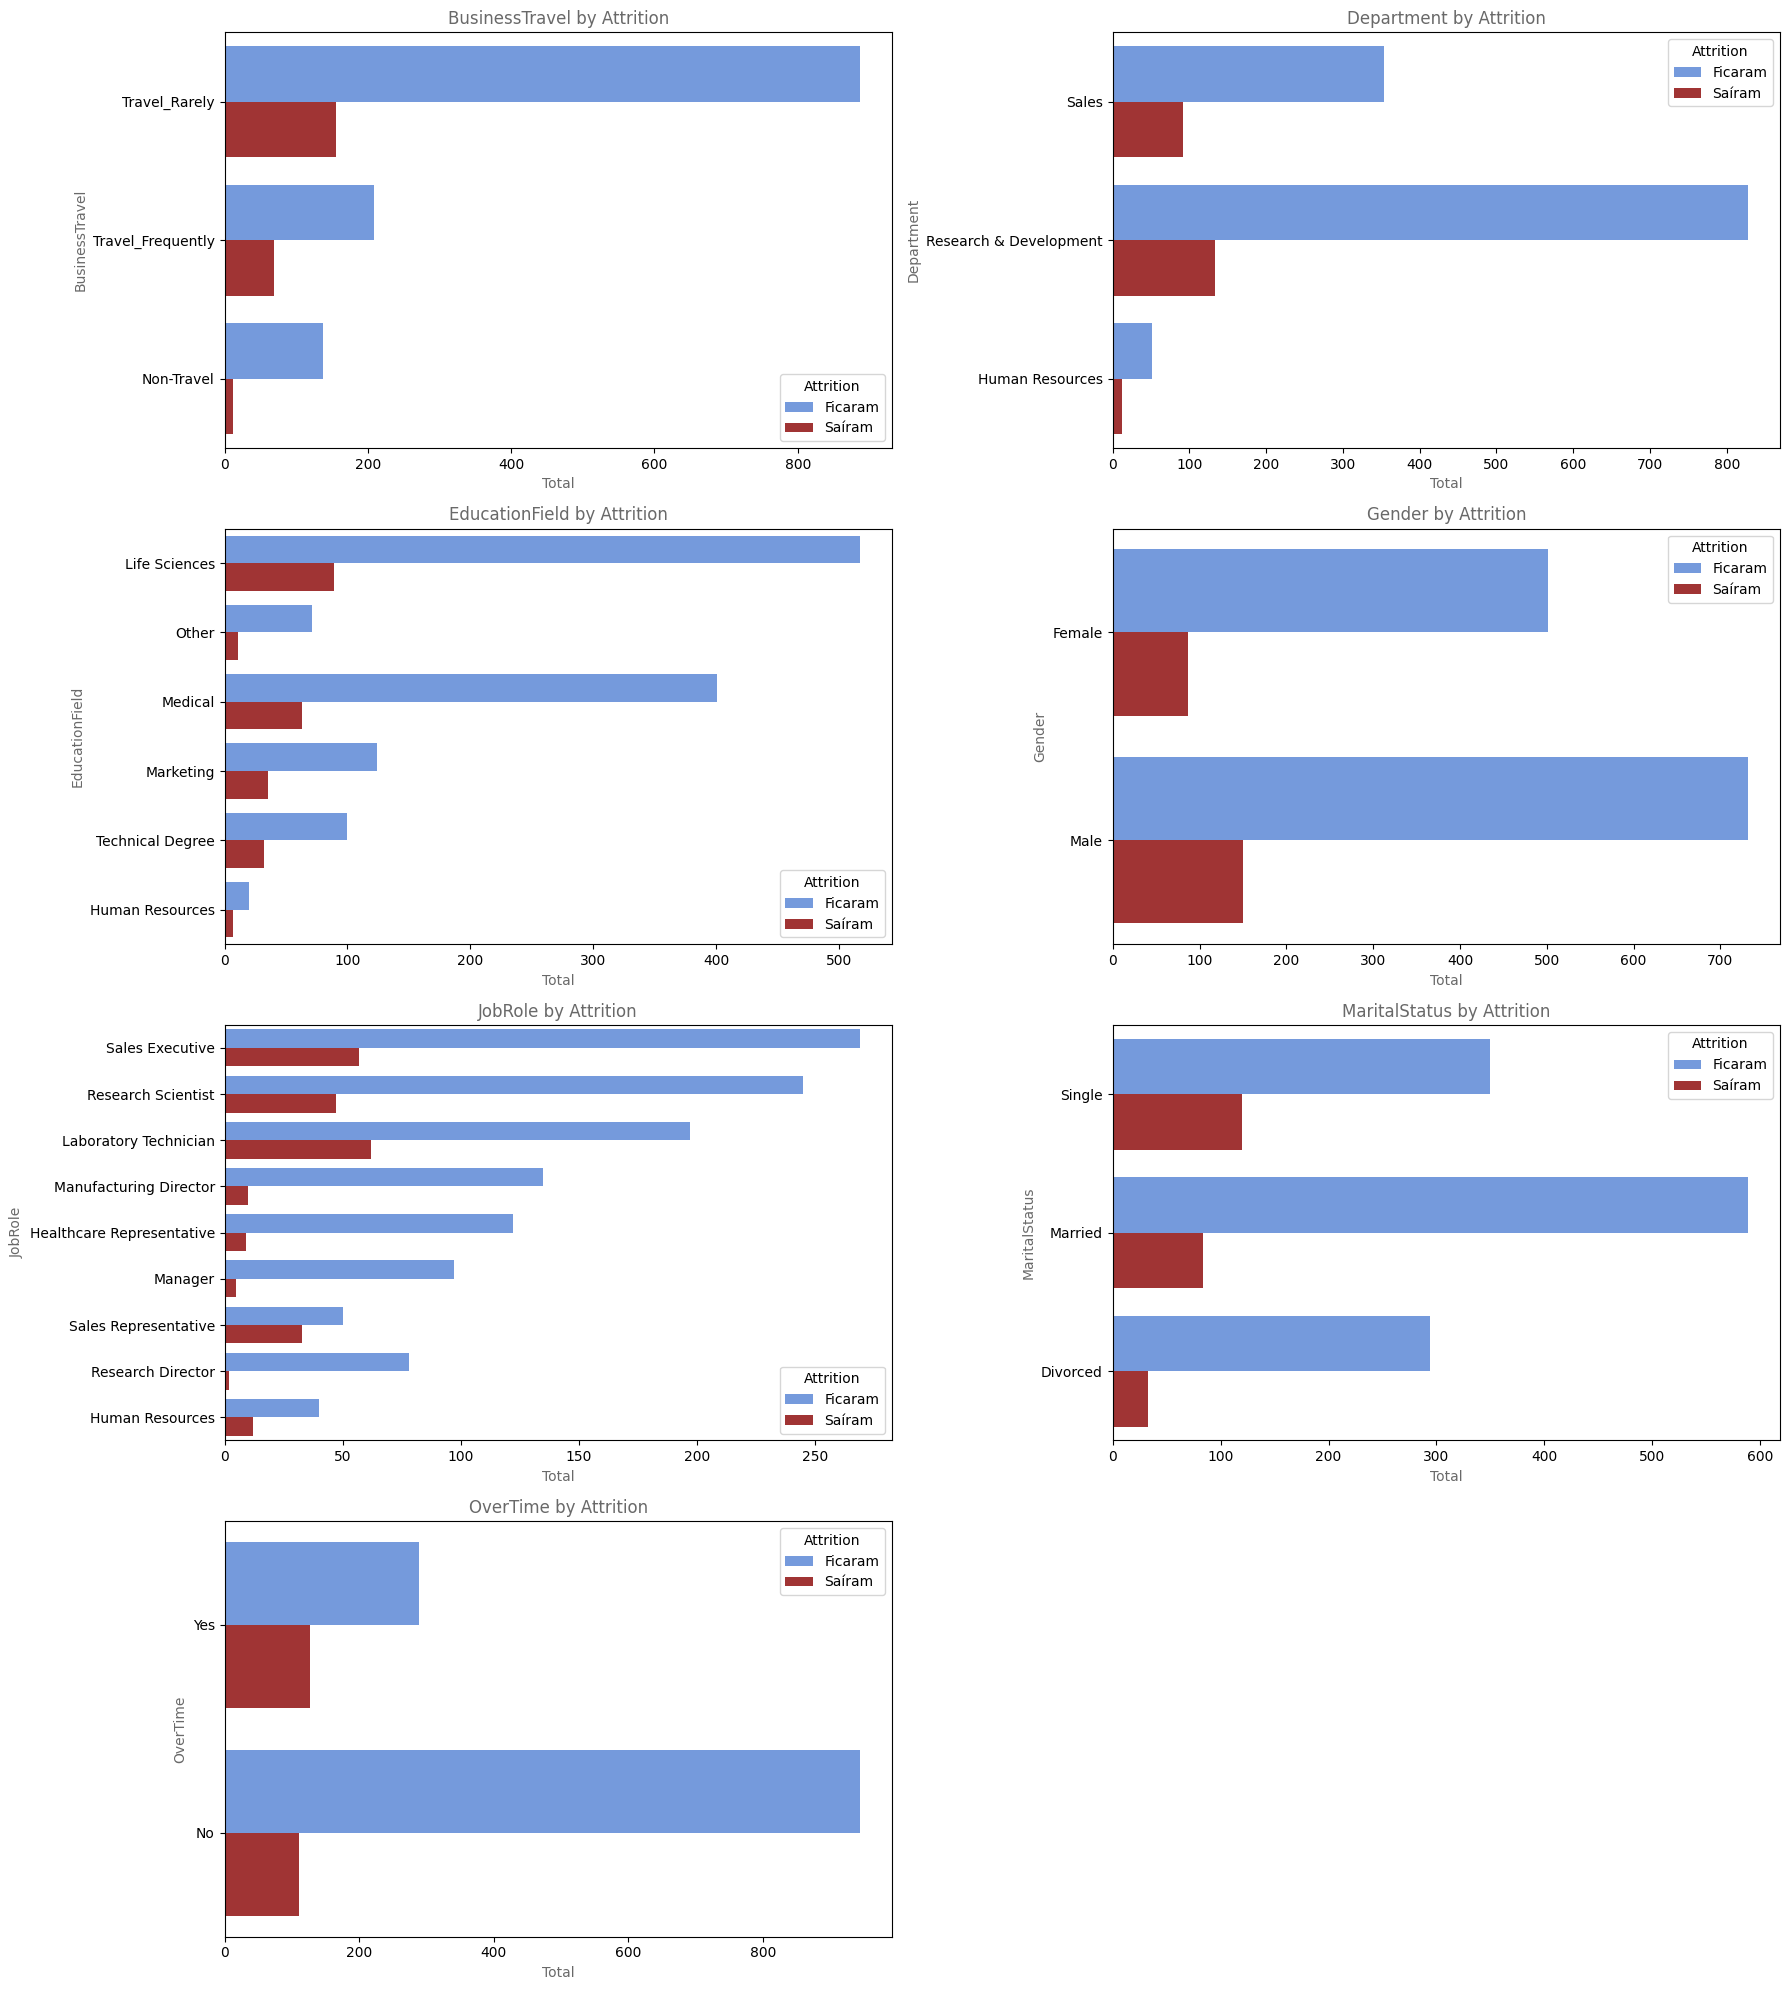

In [16]:
# gráficos de barra
colors = ['cornflowerblue', 'firebrick']
n_cols = 2
n_vars = len(cat_col)
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, cat in enumerate(cat_col):
    ax = sns.countplot(y=cat, hue='Attrition', palette=colors, data=df, ax=axes[i])
    ax.set_title(f'{cat} by Attrition', color='dimgrey')
    ax.set_xlabel('Total', color='dimgrey')
    ax.set_ylabel(cat, color='dimgrey')
    ax.legend(title='Attrition', labels=['Ficaram', 'Saíram'])

# Remove gráficos vazios se houver
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
plt.close()

### 3.5 Correlação das variáveis com o target

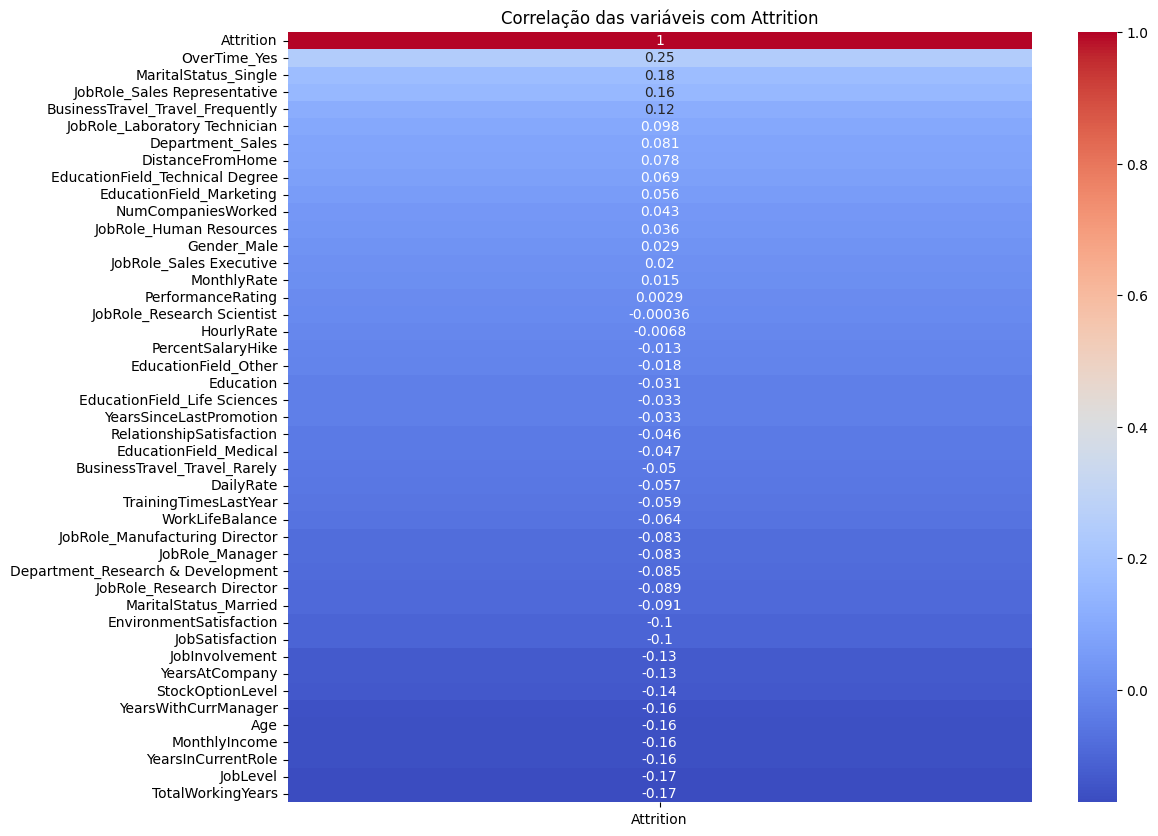

In [17]:
# matriz de correlação
corr = df_encoding.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr[['Attrition']].sort_values(by='Attrition', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlação das variáveis com Attrition')
plt.show()
plt.close()

**Correlação com a variável Attrition**

As correlações são fracas, mas significativas. Isso é comum em problemas reais de rotatividade.

### 🔹Etapa 4 – Modelagem Preditiva
**Objetivos:**

- Treinar pelo menos dois modelos supervisionados

- Realizar tuning de hiperparâmetros

- Comparar os modelos com base em métricas de classificação

### 4.1 Separando os dados

In [18]:
# separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### 4.2 Treinando os Modelos:

**Regressão Logística:**

In [19]:
# criando pipeline com escalonamento
pipeline_lr = Pipeline([('scaler', StandardScaler()),
                        ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs', 'liblinear']
}

grid_lr = GridSearchCV(
    estimator=pipeline_lr, 
    param_grid=param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1)

grid_lr.fit(X_train, y_train)

print(f'Melhores parâmetros - Regressão Logística:')
print(grid_lr.best_params_)

Melhores parâmetros - Regressão Logística:
{'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


**XGBoost:**

In [20]:
xgb_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3,4,5,6,7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 2, 5, 10]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30, 
    scoring='f1', 
    cv=5, 
    random_state=42, 
    n_jobs=-1,
    verbose=1
)

random_search_xgb.fit(X_train, y_train)

print('Melhores parâmetros - XGBoost:')
print(random_search_xgb.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Melhores parâmetros - XGBoost:
{'subsample': 0.6, 'scale_pos_weight': 5, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.6}


### 4.3 Avaliando os Modelos:

In [22]:
# regressão logística
y_pred_lr = grid_lr.predict(X_test)
print(f'Resultados do modelo: Regressão Logística')
print(classification_report(y_test, y_pred_lr))

# XGBoost
y_pred_xgb = random_search_xgb.predict(X_test)
print(f'Resultados do modelo: XGBoost')
print(classification_report(y_test, y_pred_xgb))



Resultados do modelo: Regressão Logística
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       370
           1       0.37      0.69      0.48        71

    accuracy                           0.76       441
   macro avg       0.65      0.73      0.66       441
weighted avg       0.84      0.76      0.78       441

Resultados do modelo: XGBoost
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       370
           1       0.41      0.48      0.44        71

    accuracy                           0.81       441
   macro avg       0.66      0.67      0.66       441
weighted avg       0.82      0.81      0.81       441



Se o objetivo da empresa é identificar quem tem maior risco de sair, o modelo de Regressão Logística possui maior recall na classe 1, sendo mais seguro para ações preventivas.

### 🔹Etapa 5 – Avaliação dos modelos

- Avaliar os erros (falsos positivos e falsos negativos) e o impacto para o negócio

- Ver a importância das variáveis nos modelos, incluindo métodos para explicar o modelo (coeficientes na Regressão Logística e feature importance no XGBoost).

### 5.1 Analisando erros e impacto no negócio:

Regressão Logística - Matriz de Confusão:


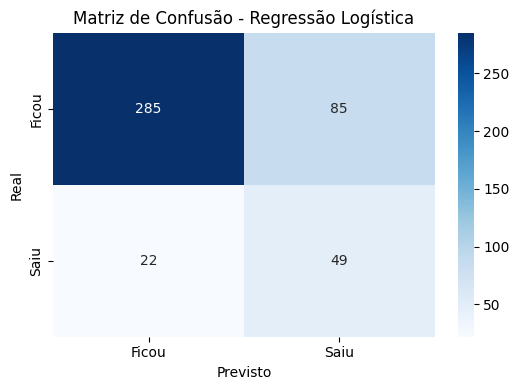

Falsos Positivos (FP): 85 -> funcionários previstos para sair, mas ficaram
Falsos Negativos (FN): 22 -> funcionários previsto para ficar, mas saíram

Impacto dos erros para o negócio:
- FP: pode gerar custos desnecesários com retenção.
- FN: perda real, pois o funcionário sai sem ação preventiva.

Regressão Logística - XGBoost:


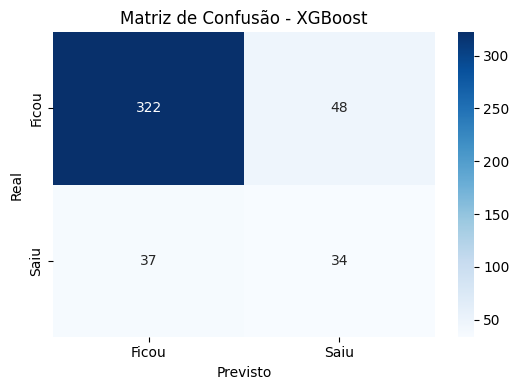

Falsos Positivos (FP): 48 -> funcionários previstos para sair, mas ficaram
Falsos Negativos (FN): 37 -> funcionários previsto para ficar, mas saíram

Impacto dos erros para o negócio:
- FP: custo com ações em funcionário que sairão.
- FN: perda de funcionários sem alerta.


In [26]:
# matriz de confusão - regressão logística
cm_lr = confusion_matrix(y_test, grid_lr.predict(X_test))
tn, fp, fn, tp = cm_lr.ravel()

# MATRIZ REGRESSÃO LOGÍSTICA
print(f'Regressão Logística - Matriz de Confusão:')
plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Ficou', 'Saiu'], yticklabels=['Ficou', 'Saiu'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.tight_layout()
plt.show()
print(f'Falsos Positivos (FP): {fp} -> funcionários previstos para sair, mas ficaram')
print(f'Falsos Negativos (FN): {fn} -> funcionários previsto para ficar, mas saíram')

# impacto
print('\nImpacto dos erros para o negócio:')
print(f'- FP: pode gerar custos desnecesários com retenção.')
print(f'- FN: perda real, pois o funcionário sai sem ação preventiva.')

# matriz de confusão - xgboost
cm_xgb = confusion_matrix(y_test, random_search_xgb.predict(X_test))
tn, fp, fn, tp = cm_xgb.ravel()

# MATRIZ XGBOOST
print(f'\nRegressão Logística - XGBoost:')
plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Ficou', 'Saiu'], yticklabels=['Ficou', 'Saiu'])
plt.title('Matriz de Confusão - XGBoost')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.tight_layout()
plt.show()
print(f'Falsos Positivos (FP): {fp} -> funcionários previstos para sair, mas ficaram')
print(f'Falsos Negativos (FN): {fn} -> funcionários previsto para ficar, mas saíram')

# impacto
print('\nImpacto dos erros para o negócio:')
print(f'- FP: custo com ações em funcionário que sairão.')
print(f'- FN: perda de funcionários sem alerta.')

### 5.2 Verificando a importância das variáveis:

**Regressão Logística (coeficientes):**

In [26]:
# extraindo coeficientes do melhor modelo
coef = grid_lr.best_estimator_.named_steps['model'].coef_[0]
features = X.columns

coef_df = pd.DataFrame({'feature' : features, 'coef' : coef})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

print('Variáveis mais importantes:')
print(coef_df.head(10))

Variáveis mais importantes:
                             feature      coef  abs_coef
43                      OverTime_Yes  0.430355  0.430355
34     JobRole_Laboratory Technician  0.226058  0.226058
11                NumCompaniesWorked  0.218969  0.218969
8                    JobSatisfaction -0.218636  0.218636
23  BusinessTravel_Travel_Frequently  0.207912  0.207912
42              MaritalStatus_Single  0.204893  0.204893
4            EnvironmentSatisfaction -0.201563  0.201563
21           YearsSinceLastPromotion  0.196985  0.196985
0                                Age -0.186476  0.186476
6                     JobInvolvement -0.180432  0.180432


Text(0, 0.5, 'feature')

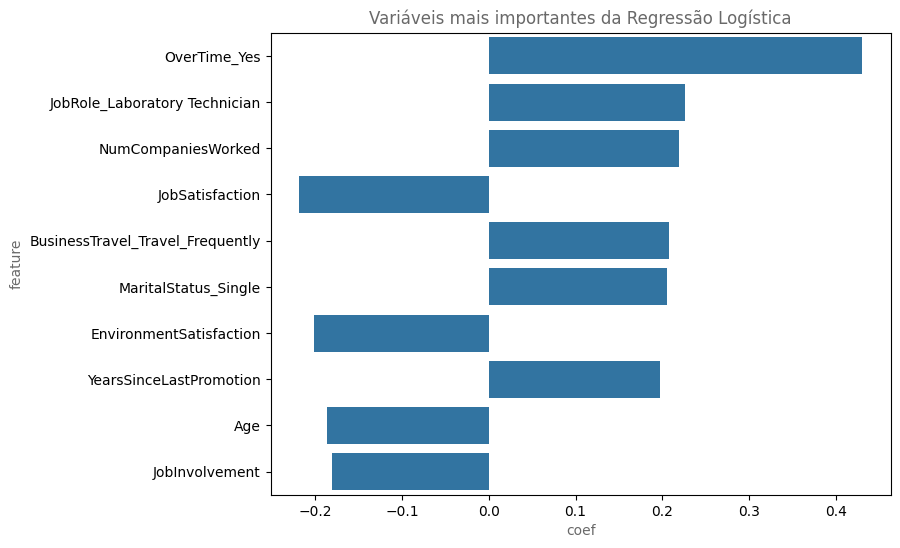

In [27]:
# visualização
plt.figure(figsize=(8,6))
sns.barplot(x='coef', y='feature', data=coef_df.head(10))
plt.title('Variáveis mais importantes da Regressão Logística', color='dimgrey')
plt.xlabel('coef', color='dimgrey')
plt.ylabel('feature', color='dimgrey')

**XGBoost (feature importance):**

In [28]:
# extraindo features do melhor modelo
xgb_best = random_search_xgb.best_estimator_

Text(0, 0.5, 'Features')

<Figure size 1000x600 with 0 Axes>

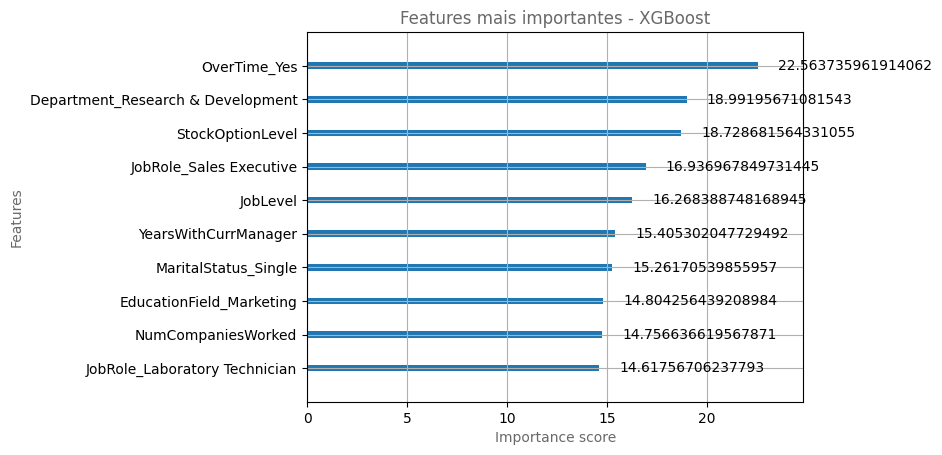

In [29]:
# visualização
plt.figure(figsize=(10,6))
plot_importance(xgb_best, max_num_features=10, importance_type='gain')
plt.title('Features mais importantes - XGBoost', color='dimgrey')
plt.xlabel('Importance score', color='dimgrey')
plt.ylabel('Features', color='dimgrey')

### 5.3 Explicação com SHAP (XGBoost):

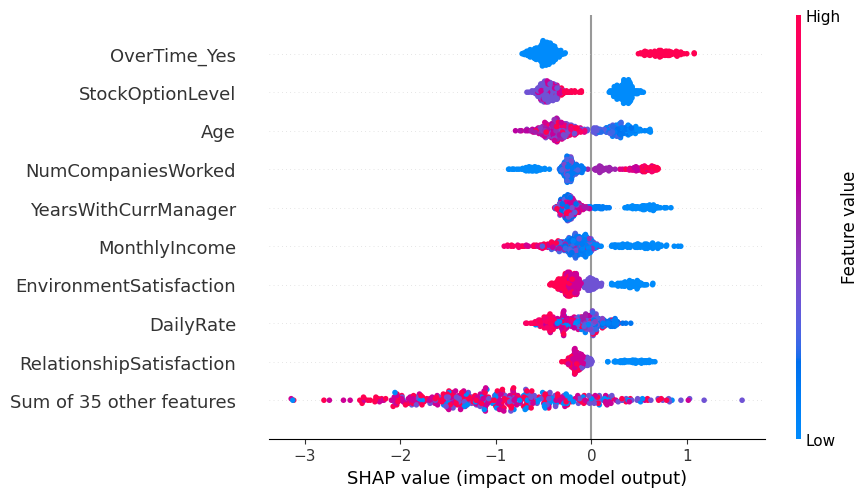

In [30]:
# inicializando o explainer
explainer = shap.Explainer(random_search_xgb.best_estimator_)
shap_values = explainer(X_test)

# resumo geral: o que mais influencia o modelo
shap.plots.beeswarm(shap_values, max_display=10)

O gráfico acima mostra as variáveis mais impactantes para as previsões do modelo. Cada ponto representa um colaborador do conjunto de teste, e a cor indica o valor da variável (azul = valor baixo, rosa = valor alto).

**Principais insights do SHAP**

```OverTime_Yes```: Funcionários que fazem hora extra (valores altos = rosa) têm maior probabilidade de pedir desligamento (valores SHAP positivos). Essa foi a variável com maior impacto no modelo.

```StockOptionLevel```: Funcionários com menor nível de opções de ações (azul) tendem a sair mais — mostrando que benefícios financeiros impactam na retenção.

```Age```: Funcionários mais jovens (azul) estão mais propensos a sair, possivelmente buscando novas oportunidades ou insatisfeitos com a estabilidade atual.

```NumCompaniesWorked```: Quanto mais empresas o colaborador já trabalhou (rosa), maior a chance de sair — pode indicar instabilidade no histórico profissional.

```YearsWithCurrManager```: Valores baixos (azul) indicam pouca convivência com o gestor atual, o que pode impactar negativamente no vínculo com a empresa.

Mesmo o XGBoost não sendo o melhor modelo final, sua explicabilidade com SHAP revela padrões valiosos de comportamento dos colaboradores.

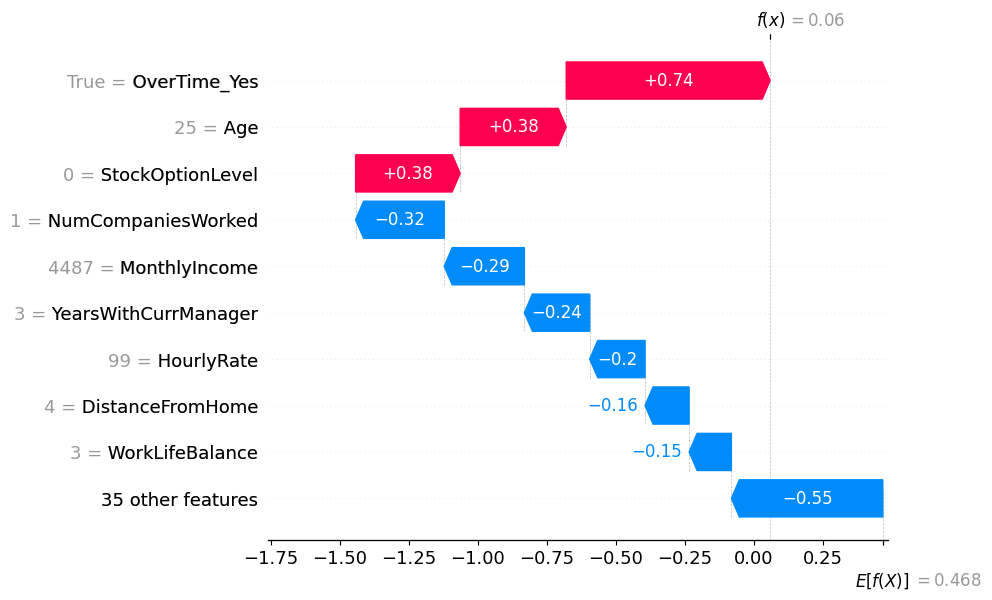

In [31]:
# explicando o primerio exemplo do X_test
shap.plots.waterfall(shap_values[0])

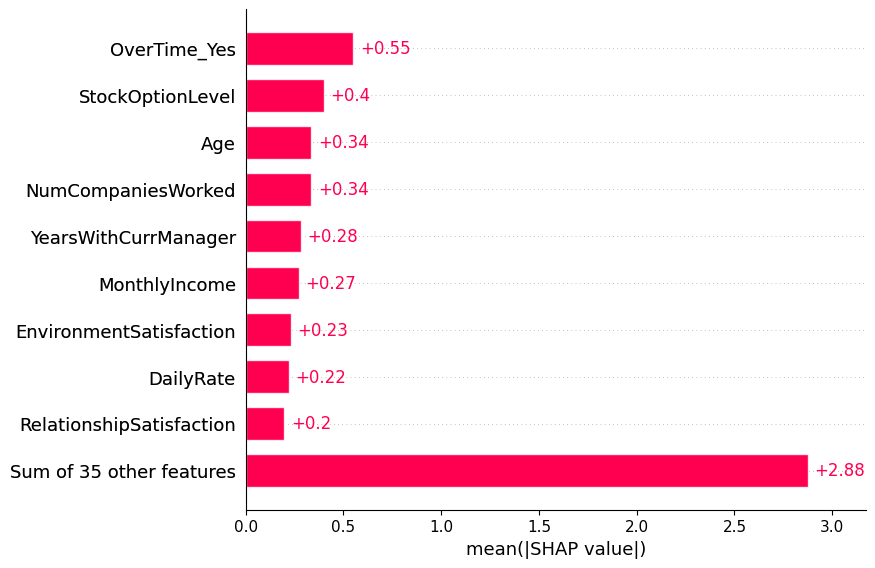

In [32]:
# feature importance simplificada
shap.plots.bar(shap_values, max_display=10)

Acima, temos o gráfico com as variáveis mais relevantes para o modelo XGBoost, gerado a partir dos valores médios absolutos de SHAP. O valor no final de cada barra representa o impacto médio (positivo ou negativo) que aquela variável teve nas previsões.

**Principais insights:**

```OverTime_Yes```: Foi a variável mais impactante. Funcionários que fazem hora extra estão mais propensos a sair da empresa.

```StockOptionLevel```: Colaboradores com menor nível de opção de ações tendem a pedir demissão mais frequentemente.

```Age```: Idade influenciou bastante: funcionários mais jovens demonstram maior propensão à rotatividade.

```NumCompaniesWorked```: Histórico com muitas empresas anteriores indica maior chance de saída.

```YearsWithCurrManager```: Pouco tempo com o mesmo gestor pode refletir menor vínculo com a equipe.

```MonthlyIncome```: Remunerações mais baixas também influenciam negativamente na retenção.

```EnvironmentSatisfaction```: Níveis mais baixos de satisfação no ambiente de trabalho aumentam o risco de saída.

### 🔹Etapa 6 – Relatório/Apresentação de Resultados

**Objetivo do Projeto:** Prever a rotatividade de funcionários (turnover) utilizando modelos de machine learning aplicados ao dataset IBM HR Analytics Attrition & Performance, com o intuito de ajudar a empresa fictícia Data Girls S.A a identificar colaboradores com maior propensão a sair da organização e tomar decisões proativas com base nesses insights.

### Recomendações Práticas para o RH da Data Girls S.A

1. Reduzir horas extras, pois sobrecarga está diretamente ligada ao risco de saída.

2. Oferecer incentivos financeiros, como opções de ações, especialmente para colaboradores mais jovens.

3. Investir na relação líder-equipe, monitorando funcionários com pouco tempo sob o mesmo gestor.

4. Fortalecer a satisfação organizacional com programas de bem-estar, clima e reconhecimento.

5. Priorizar ações de retenção para perfis com histórico instável de emprego.

## Conclusão

A Regressão Logística apresentou melhor performance na identificação de possíveis desligamentos, enquanto o XGBoost forneceu uma excelente base de explicação com SHAP. A combinação dos dois modelos permite não apenas prever o turnover, mas entender e justificar os motivos por trás dessas decisões, permitindo que a empresa atue de forma estratégica e preventiva.